In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

import env
import wrangle
import split_scale
import evaluate
import feature_engineering

### Using the data on student grades from this lesson, complete the following:

In [2]:
def wrangle_grades():
    grades = pd.read_csv("student_grades.csv")
    grades.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    df = grades.dropna().astype('int')
    return df

In [3]:
df = wrangle_grades()

In [4]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


- Split the data into train and test datasets.

In [5]:
train, test = split_scale.split_data(df)
train.shape

(76, 5)

In [6]:
test.shape

(26, 5)

- Create a model that uses exam 1 to predict the final grade.

In [7]:
X_train = train[['exam1']]
X_test = test[['exam1']]
y_train = [['final_grade']]
y_test = [['final_grade']]

In [8]:
predictions = pd.DataFrame({
    'actual': train.final_grade
})
predictions.head()

,actual
83,81
10,68
55,85
43,97
23,68


In [9]:

X = train[['exam1']]

y = train.final_grade


lm = sklearn.linear_model.LinearRegression()

lm.fit(X, y)

predictions['simple_lm_exam1'] = lm.predict(X)


In [10]:
predictions.head()

,actual,simple_lm_exam1
83,81,82.204427
10,68,66.176279
55,85,85.257407
43,97,92.889859
23,68,66.176279


- Create a model that uses exam 2 to predict the final grade.

In [11]:
X = train[['exam2']]

y = train.final_grade


lm = sklearn.linear_model.LinearRegression()

lm.fit(X, y)

predictions['simple_lm_exam2'] = lm.predict(X)

In [12]:
predictions.head()

,actual,simple_lm_exam1,simple_lm_exam2
83,81,82.204427,74.031122
10,68,66.176279,69.034548
55,85,85.257407,84.024269
43,97,92.889859,94.017417
23,68,66.176279,69.034548


- Compare your models in the following manner:

> Calculate the mean squared error

> Visualize the residuals. Create a seperate visualization for each model.

> Visualize the actual vs the predicted values. Create a seperate visualization for each model.

> Bonus: Combine the seperate visualizations for each model into a single visualization. Is this visual helpful?

calculate mean squared error

In [14]:
predictions['baseline'] = train.final_grade.mean()

In [20]:
predictions.head()

,actual,simple_lm_exam1,simple_lm_exam2,multiple_rfe,baseline
83,81,82.204427,74.031122,82.350193,81.039474
10,68,66.176279,69.034548,65.619578,81.039474
55,85,85.257407,84.024269,85.025647,81.039474
43,97,92.889859,94.017417,93.779268,81.039474
23,68,66.176279,69.034548,65.619578,81.039474


In [17]:
sklearn.metrics.mean_squared_error(predictions.actual, predictions.baseline)

111.06423130193903

In [16]:
sklearn.metrics.mean_squared_error(predictions.actual, predictions.simple_lm_exam1)

3.501107874542976

In [18]:
sklearn.metrics.mean_squared_error(predictions.actual, predictions.simple_lm_exam2)

14.683472685883622

Visualize the residuals. Create a seperate visualization for each model.

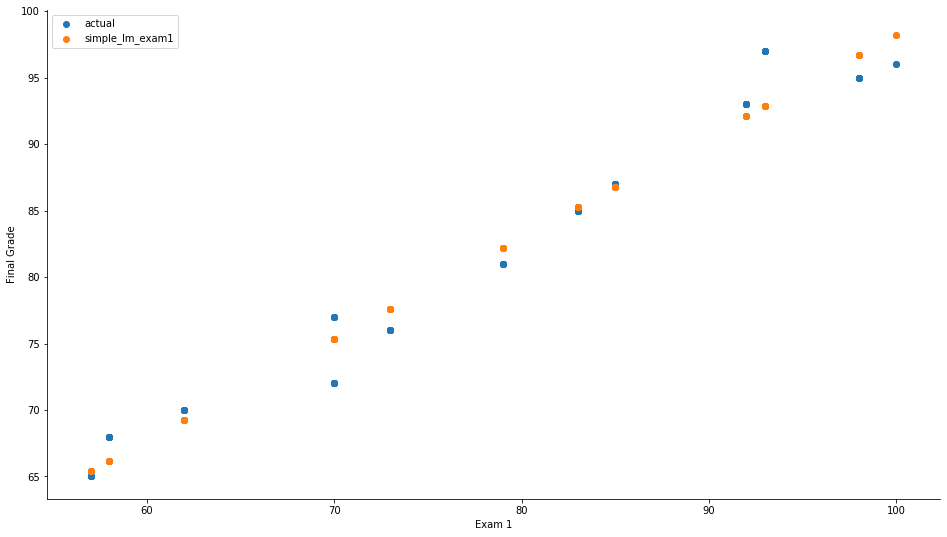

In [37]:
plt.figure(figsize=(16, 9))
plt.scatter(train.exam1, train.final_grade, label='actual')
plt.scatter(train.exam1, predictions.simple_lm_exam1, label='simple_lm_exam1')
 
plt.xlabel('Exam 1')
plt.ylabel('Final Grade')
plt.legend()

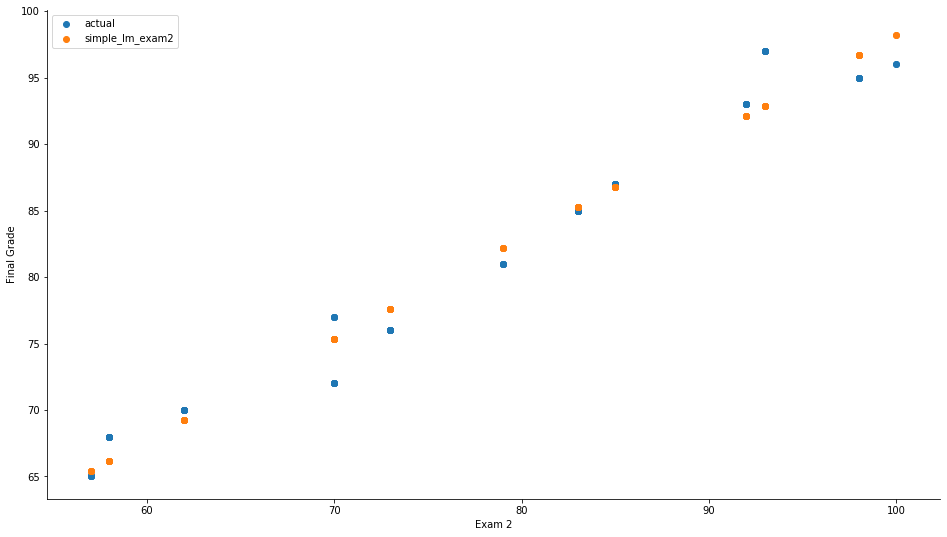

In [40]:
plt.figure(figsize=(16, 9))
plt.scatter(train.exam1, train.final_grade, label='actual')
plt.scatter(train.exam1, predictions.simple_lm_exam1, label='simple_lm_exam2')
 
plt.xlabel('Exam 2')
plt.ylabel('Final Grade')
plt.legend()

- Create a model that uses exam 1 and exam 3 to predict final grade. How does this model compare to your previous ones?

In [13]:
import sklearn.feature_selection

X = train.drop(columns='final_grade')
y = train.final_grade

lm = sklearn.linear_model.LinearRegression()
k = 2

# 1. Transform our X
rfe = sklearn.feature_selection.RFE(lm, 2)
rfe.fit(X, y)
print('selected top 2 features:', X.columns[rfe.support_])
X_rfe = rfe.transform(X)

# 2. Use the transformed x in our model
lm.fit(X_rfe, y)

predictions['multiple_rfe'] = lm.predict(X_rfe)

predictions.head()

selected top 2 features: Index(['exam1', 'exam3'], dtype='object')


,actual,simple_lm_exam1,simple_lm_exam2,multiple_rfe
83,81,82.204427,74.031122,82.350193
10,68,66.176279,69.034548,65.619578
55,85,85.257407,84.024269,85.025647
43,97,92.889859,94.017417,93.779268
23,68,66.176279,69.034548,65.619578


- Take your best preforming model and measure its performance on the test data set. How does performance differ between train and test?